# Import tools

In [159]:
# Numpy for linear algebra
import numpy as np

# pandas for data processing, e.g., CSV file handling for input/output
import pandas as pd

# Set to display all rows and columns when calling the dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings.py to suppress warnings
import warnings
warnings.filterwarnings('ignore')


### Get and inspect data matrix

In [160]:
file = 'data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file)

def print_data_info(data):
    print(f'Matrix size: {data.size}\nMatrix Rows: {len(data.axes[0])}\nMatrix Columns: {len(data.axes[1])}')

print_data_info(data)

Matrix size: 51450
Matrix Rows: 1470
Matrix Columns: 35


### Reduce matrix resolution (dimensionality)

In [161]:
# Code block removes irrelevant data
# Justification: It's hard to imagine that the employee number would have any impact on whether an employee would resign or not. The remaining variables being dropped do not have unique values, defining them as useless/redundant data.

for col in data:
    if data[col].nunique() == 1:
        data = data.drop([col],axis=1)
    elif data[col].nunique() == len(data.axes[0]):
        data = data.drop([col], axis=1)


print_data_info(data)

Matrix size: 45570
Matrix Rows: 1470
Matrix Columns: 31


### Check null values

In [162]:
# Calculate the number of missing values per variable and display it in a new dataframe
missing_data_sum = pd.DataFrame({'null_values_amount' : data.isnull().sum()})
missing_data_sum

,null_values_amount
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


### Visualize numeric values within the data matrix using the Histogram chart type


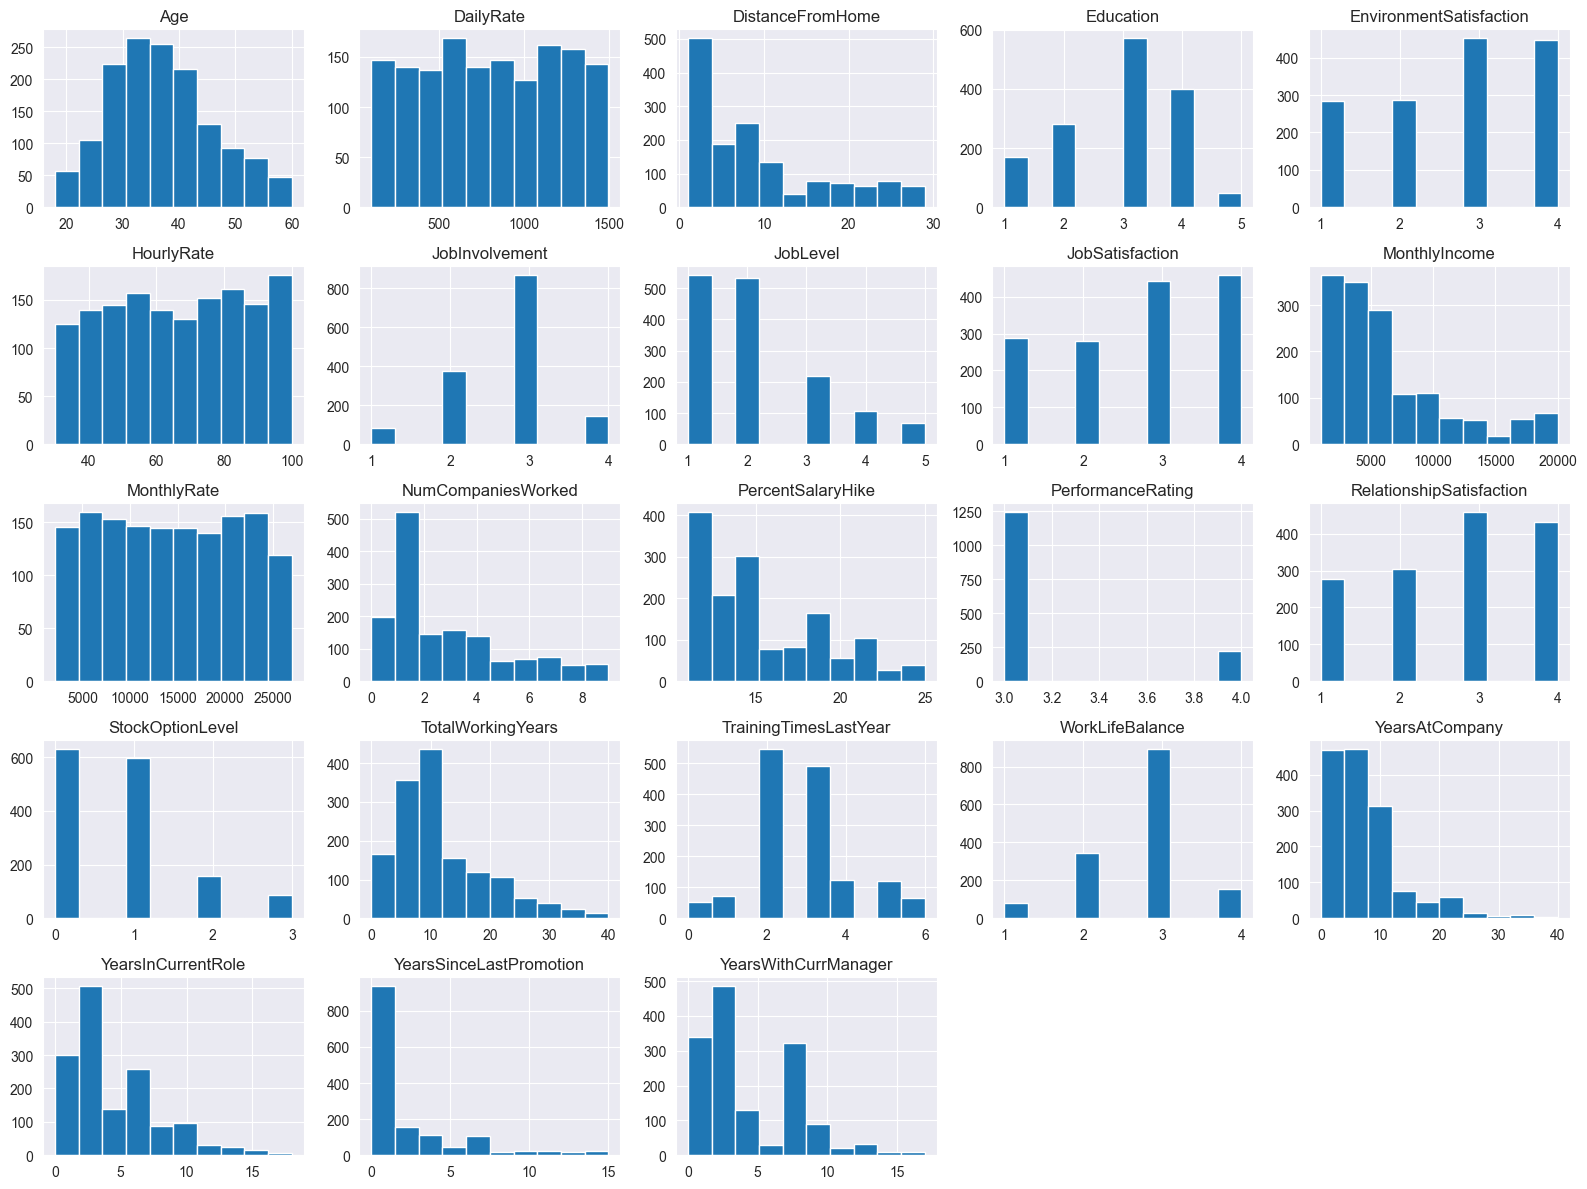

In [163]:
numerical_datatypes = data.select_dtypes(include=np.number)
numerical_datatypes.hist(figsize=(16,12))
plt.tight_layout()

# Boxplot to identify obvious outliers

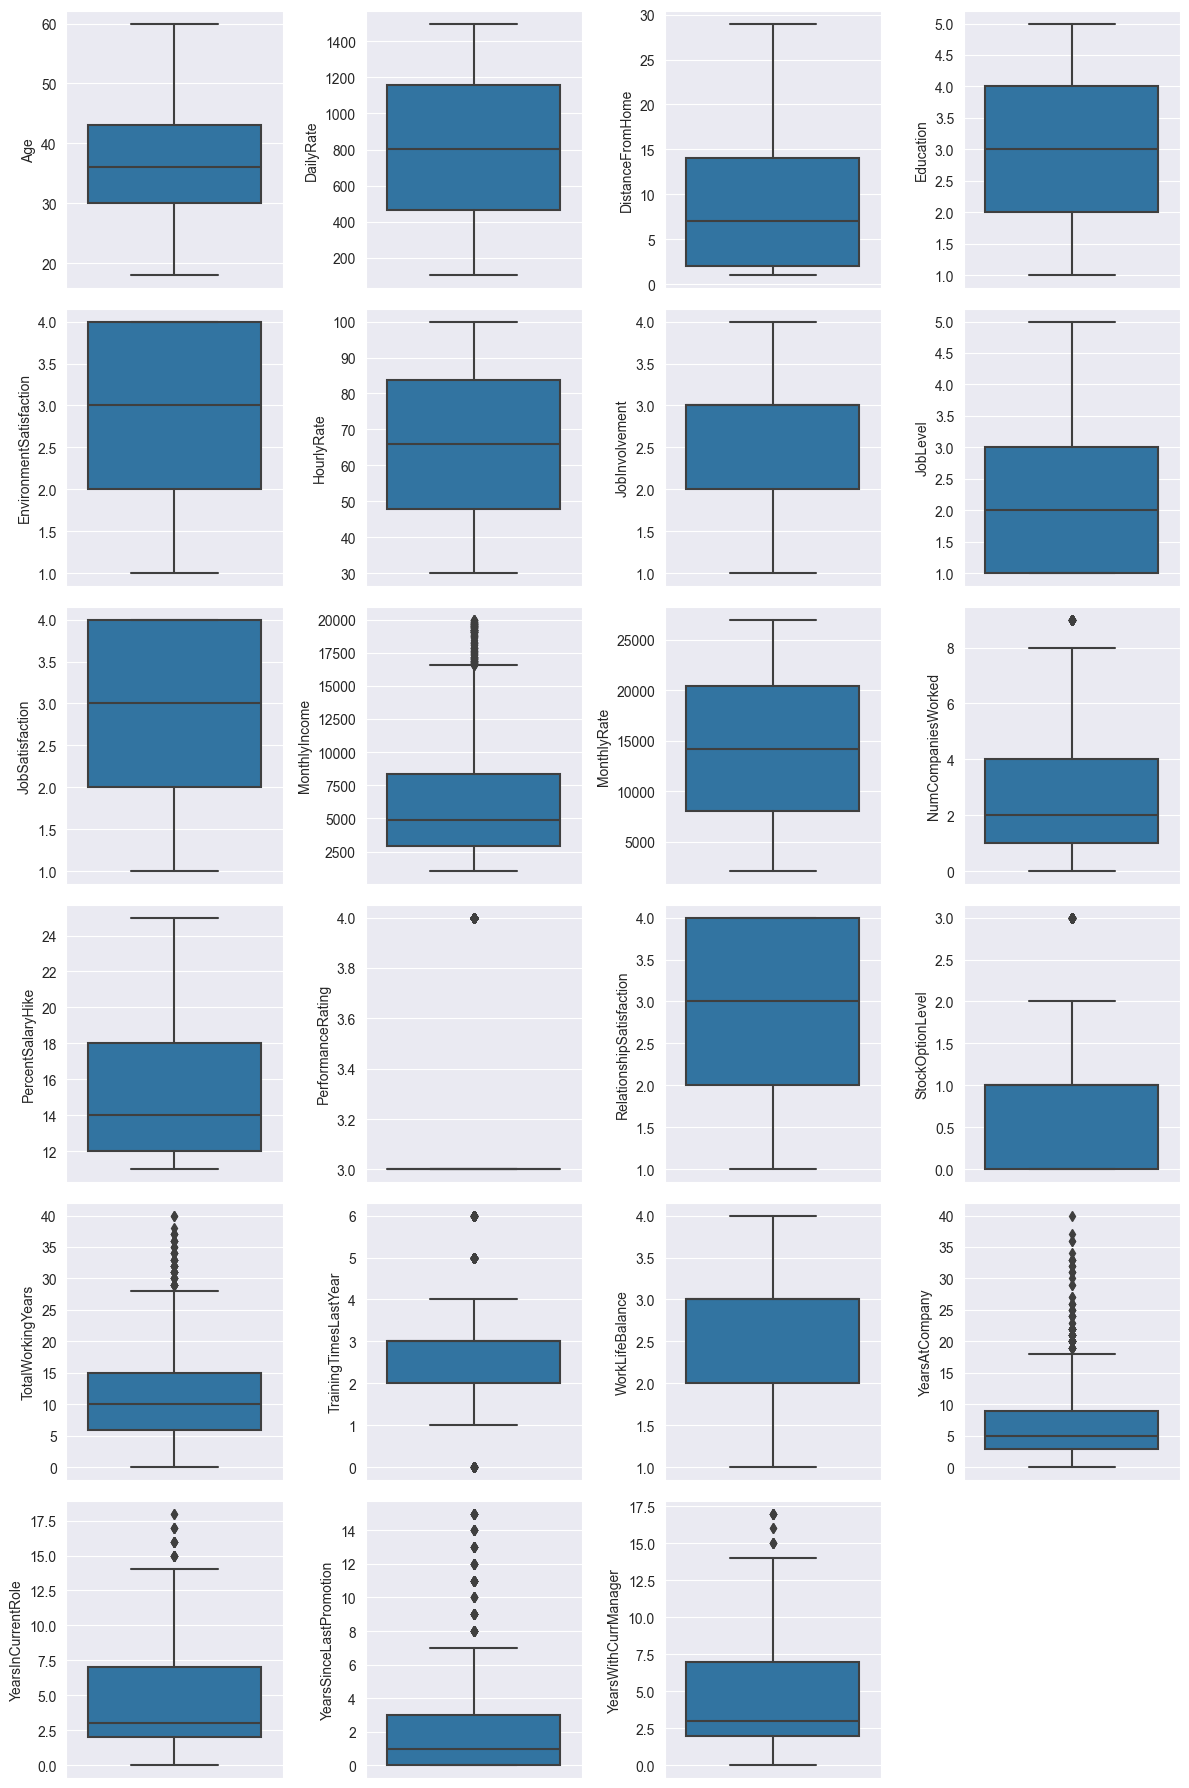

In [164]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_datatypes.columns)):
    fig.add_subplot(6,4,i+1)
    sns.boxplot(y=numerical_datatypes.iloc[:,i])
plt.tight_layout()
plt.show()


### Transform every column that is of categorical nature. Nominal or ordinal scalar.

In [165]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for cat in data:
    data[cat] = LE.fit_transform(data[cat])

### Handle outliers with the standardization score z = (X - μ) / σ.


In [166]:
absolute_range_number = 3
from scipy.stats import zscore
z_score=abs(zscore(data))
# Select the rows whose standardization scores are within the range of -3 and 3.
data = data.loc[(z_score < absolute_range_number).all(axis=1)]


### Define the independent variables and the dependent variable (X, y).

In [167]:
# Given that we want to predict attrition, Attrition = y, and X are the selected features. Therefore:
X = data.drop(['Attrition'], axis = 1) # X = all columns except Attrition 

y = data['Attrition'] # y = Attrition


### Convert data into a standard format so that the computer can better understand and use the provided material.


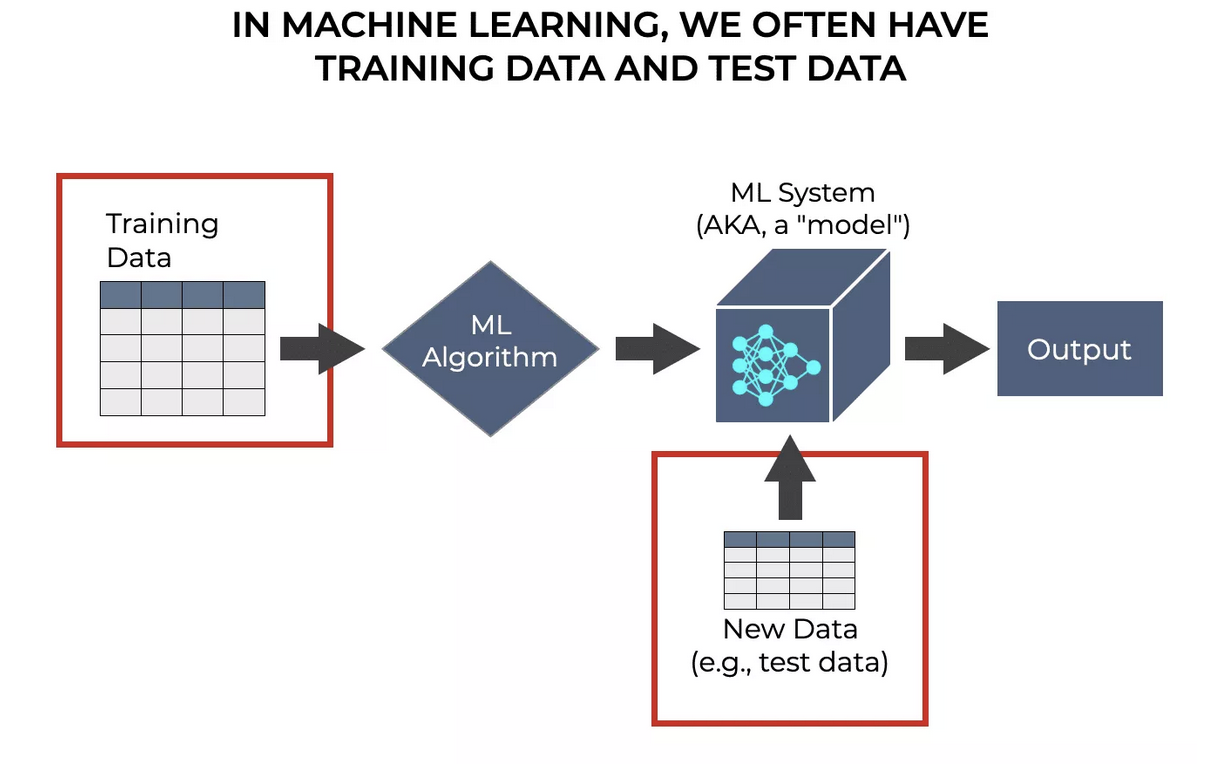

In [168]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled data and preserve column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display an image if needed
Image(filename="img/model.png")

### The data is now cleaned and prepared in such a way that it is suitable for machine learning models to interpret.

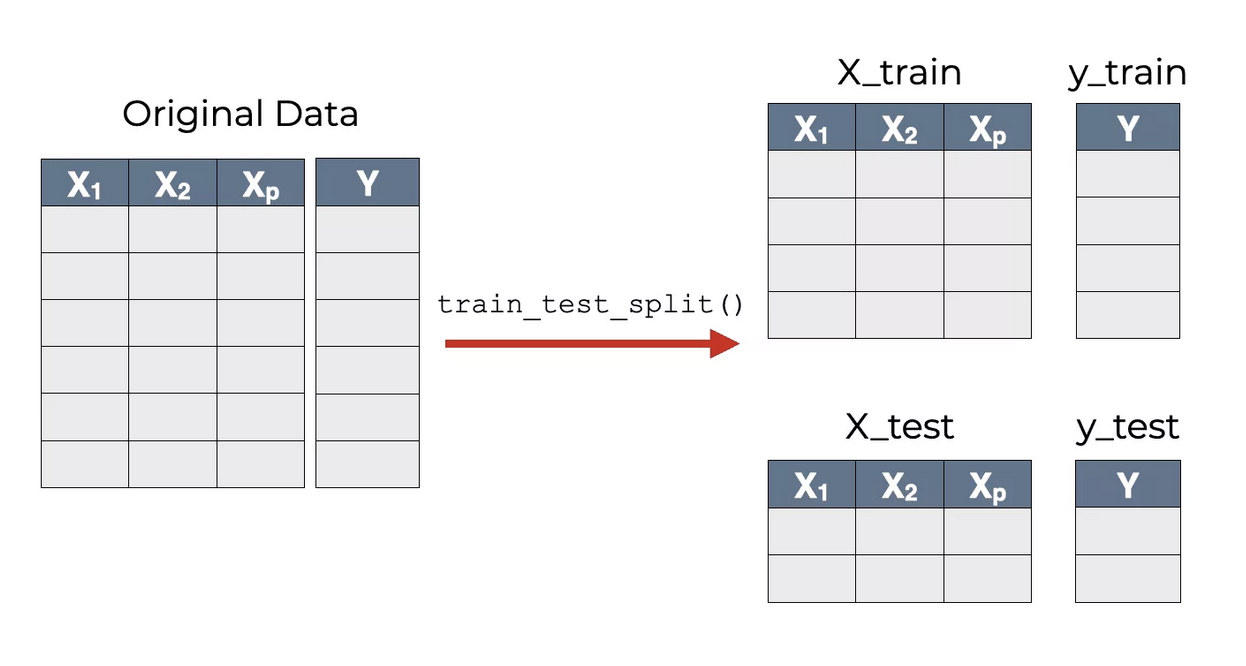

In [169]:
Image(filename="img/train_test_split.png")

# 1. Split the cleaned data matrix so that we have
* a training set
* a prediction set
for our models.

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled_df,y, test_size = 0.20, random_state = 42)

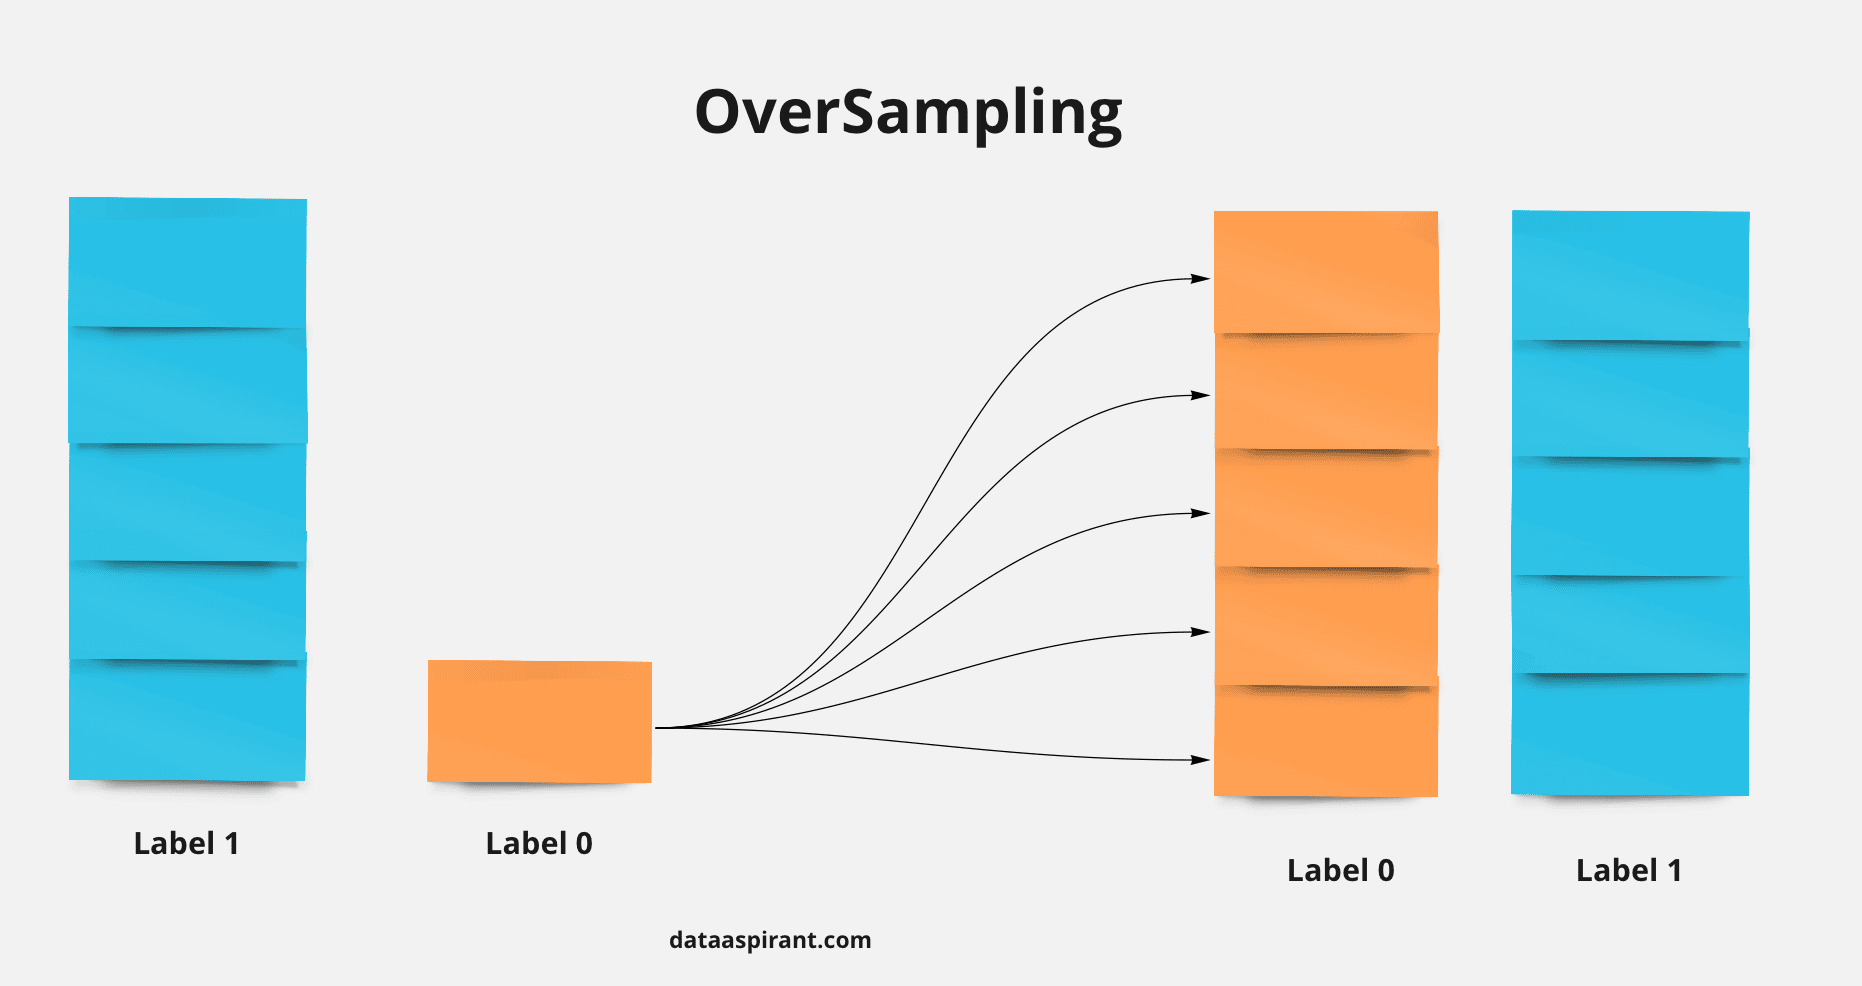

In [171]:
Image("./img/oversampling_visualisation.png")

### Balance sample to avoid model bias

In [172]:
from imblearn.combine import SMOTETomek
from collections import Counter


smt = SMOTETomek()


X_train_oversampled,y_train_oversampled = smt.fit_resample(X_train,y_train)

print(f'Train set original-size: {Counter(y_train)}')
print(f'Train set processed-size after oversampling: {Counter(y_train_oversampled)}')


Train set original-size: Counter({0: 932, 1: 177})
Train set processed-size after oversampling: Counter({0: 932, 1: 932})


In [173]:
from sklearn.model_selection import train_test_split

# Convert y from 1d to 2d array with one column
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

# fitting logistic regression model to the training set
logistic_regression_model = LogisticRegression(fit_intercept=True)
logistic_regression_model.fit(X_train, y_train)

# Predict (here done on both test and training set)
y_pred_train = logistic_regression_model.predict(X_train)

# Predict the observations in the test container
y_pred_test = logistic_regression_model.predict(X_test)

y_hat = y_pred_test.flatten()
df_compare = pd.DataFrame({"regression_prediction": y_hat, "real_value": y_test})
df_compare

,regression_prediction,real_value
233,0,0
530,0,0
1221,1,1
471,1,1
415,1,1
631,0,0
1442,1,1
414,1,1
888,0,0
1175,1,1


In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(machine_learning_model, X_train, y_train, X_test, y_test, train=True):
    # Ifall vi passerar in bool-värdet True som argument vid parametern train så övervakar vi maskinen så vi kan se hur den har presterat på träningsdata.
    if train:
        pred = machine_learning_model.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result:')
        print('='*50)
        print(f'Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%')
        print('-'*50)
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print('-'*50)
        print(f'Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n')

    # Ifall vi passerar in  bool-värdet False som argument vid parametern train så kommer vi skriva testa hur vår modell lämpar sig på ny data som den inte är bekant med.
    elif not train:
        pred = machine_learning_model.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("%s 🤖Test Result:\n================================================" % machine_learning_model)
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}")
        clf_report

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

rand_for_clf = RandomForestClassifier()

rand_for_clf.fit(X_train, y_train)


plt.show()
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

print_score(logistic_regression_model, X_train, y_train, X_test, y_test, train=False)

print_score(rand_for_clf, X_train, y_train, X_test, y_test, train=False)

DecisionTreeClassifier(max_depth=4) 🤖Test Result:
Accuracy Score: 83.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.854054    0.819149  0.836461    0.836601      0.837116
recall       0.822917    0.850829  0.836461    0.836873      0.836461
f1-score     0.838196    0.834688  0.836461    0.836442      0.836494
support    192.000000  181.000000  0.836461  373.000000    373.000000
_______________________________________________
Confusion Matrix: 
 [[158  34]
 [ 27 154]]
LogisticRegression() 🤖Test Result:
Accuracy Score: 82.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.849162    0.793814  0.820375    0.821488      0.822304
recall       0.791667    0.850829  0.820375    0.821248      0.820375
f1-score     0.819407    0.821333  0.820375    0.820370      0.820342
suppor

# TP FP, FN TP
# cm[0][0] = True, cm[1][1] = True, cm[0][1] = False, cm[1][0] = False.

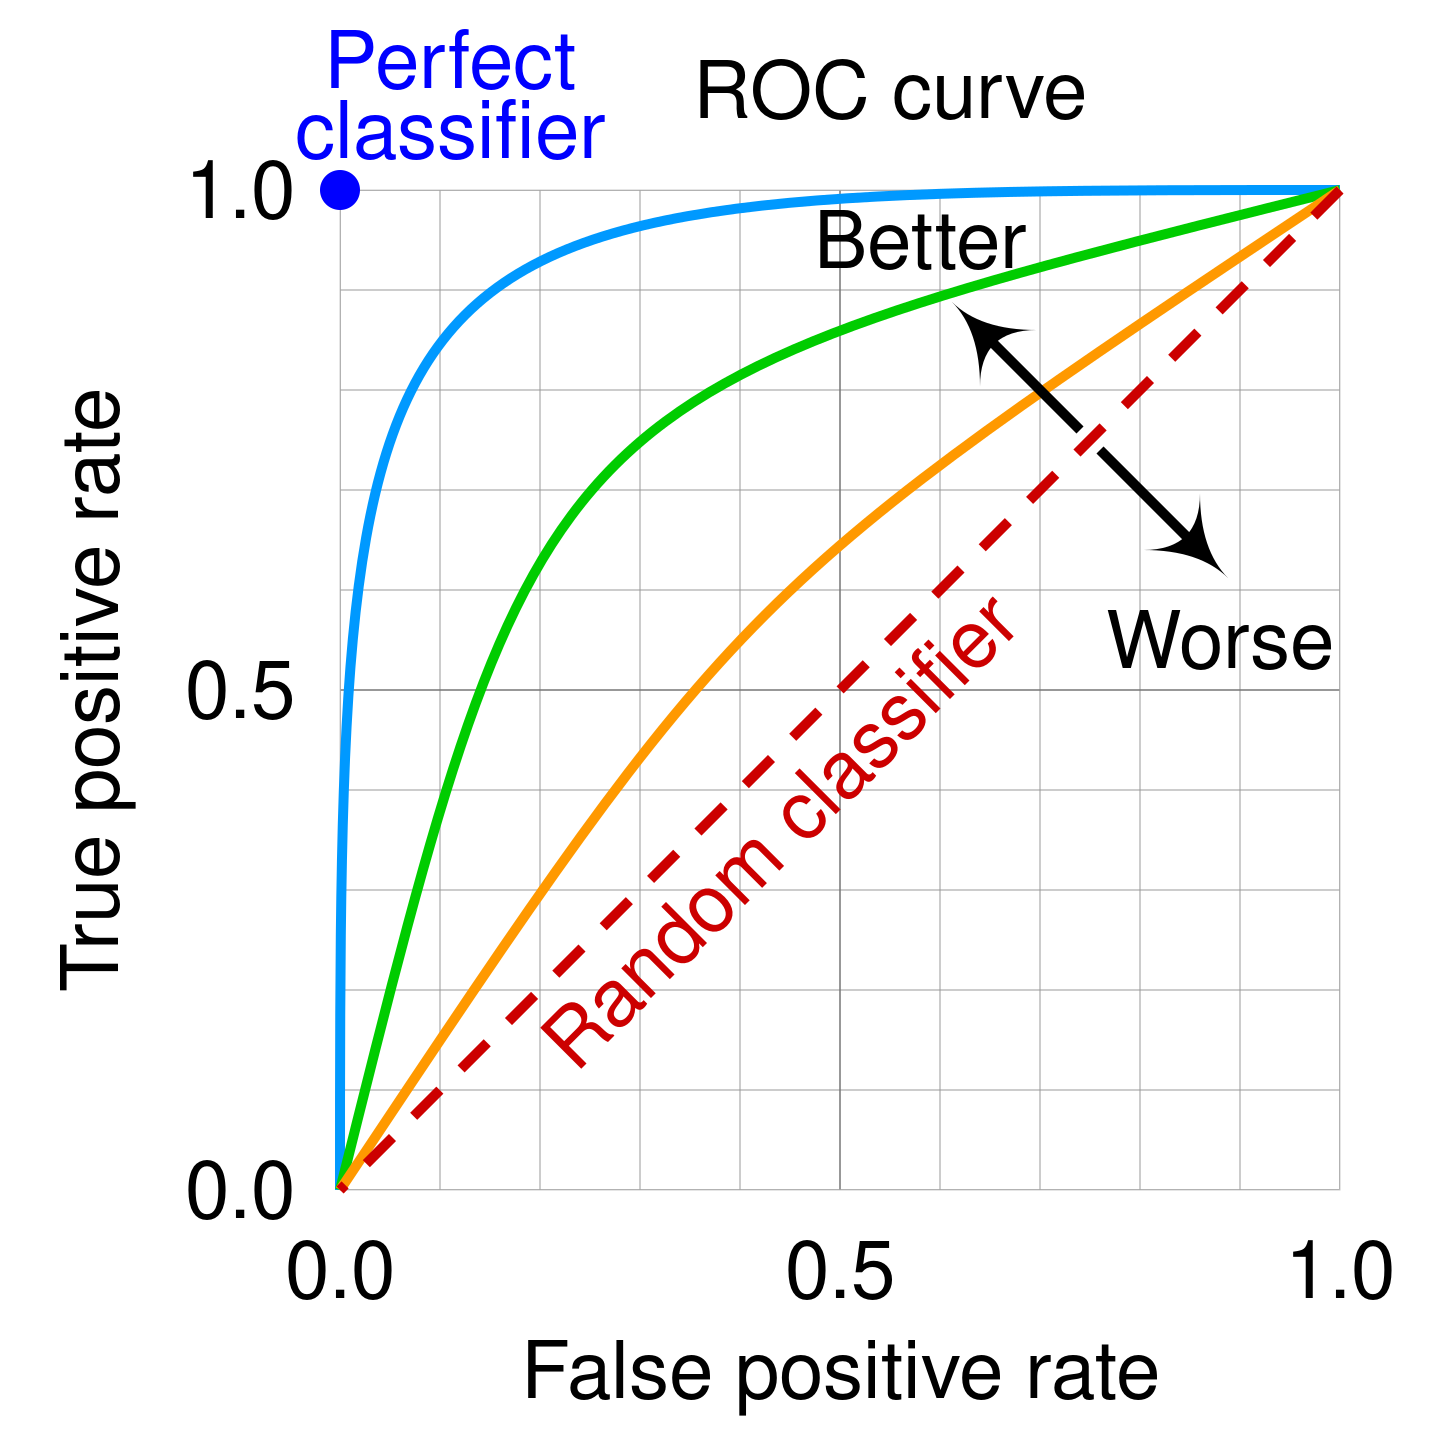

In [176]:
Image(filename="./img/roc_curve_explaination.png")

# When (N = 100), where classifier's (AUC score = 0.5), we can be 95% confident that the hypothetical model will guess correctly between 40 and 60 times. We can be 5% confident that it guesses correctly exactly 50 times.

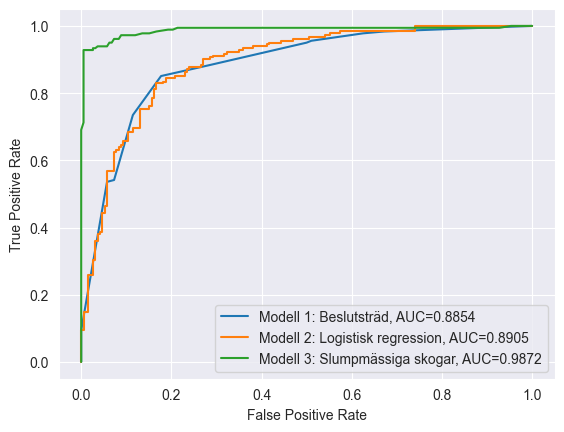

In [177]:
from sklearn import metrics

# Set up plotting area
plt.figure(0).clf()

# Fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])
auc = round(metrics.roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1]), 4)
plt.plot(fpr,tpr,label="Modell 1: Beslutsträd, AUC="+str(auc))

# Fit dtree model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
auc = round(metrics.roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test)[:, 1]), 4)
plt.plot(fpr,tpr,label="Modell 2: Logistisk regression, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, rand_for_clf.predict_proba(X_test)[:, 1])
auc = round(metrics.roc_auc_score(y_test, rand_for_clf.predict_proba(X_test)[:, 1]), 4)
plt.plot(fpr,tpr,label="Modell 3: Slumpmässiga skogar, AUC="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
# Add legend
plt.legend()


# What the above line chart is trying to explain to us is the following:
## When the models are provided with a randomly chosen positive instance and a randomly chosen negative instance, the Area Under Curve (AUC) score represents the probability at which the machine learning algorithm is capable of telling us which instance is true and which is false. 
### In Short: Our machines are real tools that are useful for businesses that want to make a more informed decision than chance. Given the problem statement, these models can provide economic value.


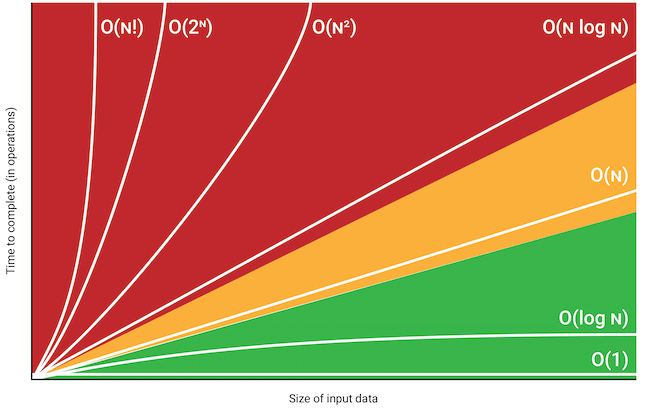

In [178]:
Image(filename ="./img/big_o_chart.png")

Evaluate the models appropriately and compare the different algorithms. 

* k' = number_of_trees
* m = number_of_variables
* n = number_of_training_observations

# ORDO-NOTATION - complexity of our models

## Logistic Regression

### Training time complexity = O(n*m)
### Testing time complexity = O(m)
### Space complexity = O(m)

## Decision Trees
### Training time complexity = O(n*log(n)*m)
### Testing time complexity = O(m)
### Space complexity = O(tree_depth)
## Random Forests
### Training time complexity = O(k'n*log(n)*m)
### Testing time complexity = O(m*k')
### Space complexity = O(k'*tree_depth)



# Model Issues
## 1. Logistic Regression
### Logistic regression tends to suffer from "overfitting" in high dimensions. "Overfitting" is a concept in data science that occurs when a statistical model performs excessively well on the training data. When this happens, the algorithm may not perform accurately on unseen data, rendering it meaningless.

#### In our case, this means that if the business wants to delve deeper with higher dimensionality of the dataset, there is a risk that the logistic model will

# 2. Decision Trees
## A small change in the data matrix can cause significant changes in the structure of the decision tree, leading to instability. As N becomes larger, decision trees tend to become too complex and hard to interpret (especially in deep levels).


# 3. Random Forests
## In general, random forests have very high accuracy. The main limitation of random forests is that a large number of trees can slow down and make the algorithm inefficient.

### In a practical context, a random forest with many trees can perform operations so slowly that it becomes too late to predict real-time events."


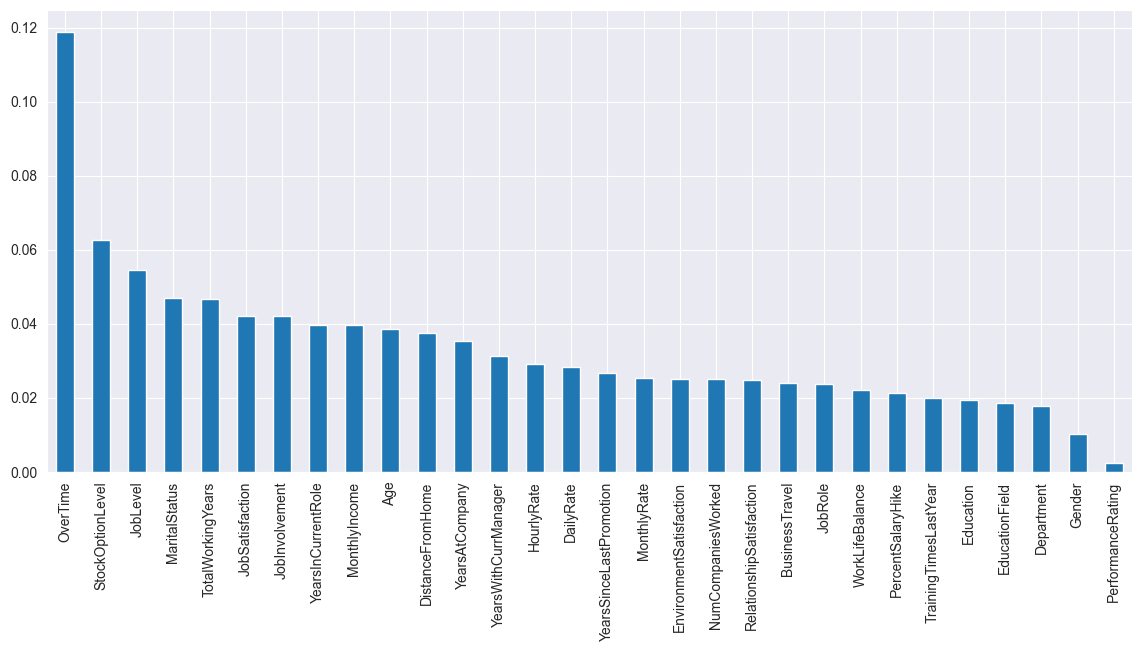

In [182]:
pd.Series(rand_for_clf.feature_importances_,
          index=X.columns).sort_values(ascending=False).plot(kind="bar",
                                                             figsize=(14, 6));


### The above bar chart ranks which variables are important for our prediction.

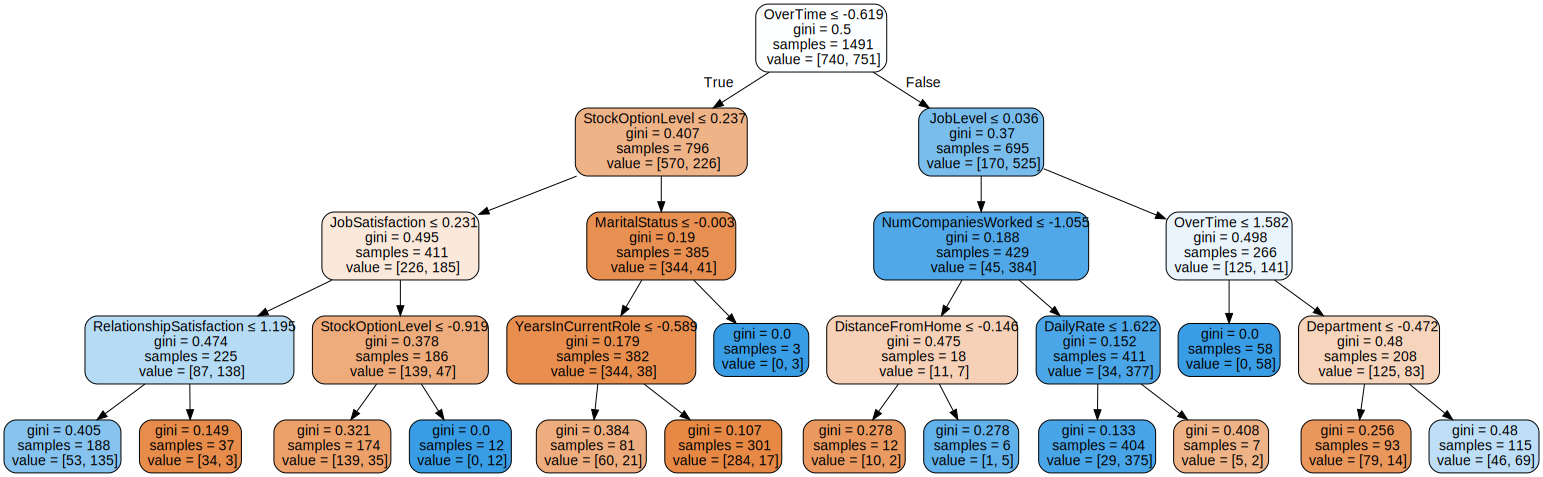

In [183]:
from graphviz import Source

decision_tree_plot = Source(tree.export_graphviz(tree_clf, out_file=None,
                                                 feature_names=X_train.columns,
                                                 filled=True, rounded=True, special_characters=True))
decision_tree_plot

# Blue = Staying
# Orange = Resigning
# Requirement 7. Select the best algorithm for your problem (out of the 3 you tested) and justify and explain why it is the most suitable.
## If the CEO or another leader randomly selects an employee to guess whether that person will resign in the future, => it is more likely that the predictive analysis offered here will be able to select an employee better than chance.

## I recommend the decision tree. The motivation is that it is easy to understand in decision-making, and the model can provide a straightforward decision. Ideally, one should combine both the decision tree and the important features from the random forests in their reasoning.

# What efforts are needed to make employees achieve higher productivity?

## "Attrition" was an imbalanced variable in the data matrix, which led me to oversample the observations. Random oversampling can increase the probability of overfitting occurring. There were also some data skewness and outliers that could not or should not be removed. If we had a larger dataset, we could sacrifice more outliers, but given that the dataset was of a smaller size, it wasn't worth reducing the dataset.

### Wikipedia example: IBM had (in 2017) 380,300 employees worldwide, of which about 4,000 were in Sweden (in 2002). Microsoft ~221,000 (in 2022)
### All recommendations should apply to companies where the number of employees is  ~ 800
